<a href="https://colab.research.google.com/github/KritikMahesh/KritikMahesh/blob/main/Handwritten_Digit_Recognition_Using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship Project: Handwritten Digit Recognition using CNN

**Name**: Kritik Mahesh  
**Institution**: Manipal Academy of Higher Education, Dubai  
**Platform**: Google Colab  
**Framework**: TensorFlow + Keras

---

###  Project Objective:
To build a neural network model capable of recognizing handwritten digits (0–9) from the MNIST dataset using a Convolutional Neural Network (CNN). The model is trained, evaluated, and visualized to analyze performance and prediction accuracy.

This notebook includes:
- Data preprocessing & normalization  
- CNN architecture building and training  
- Evaluation using test accuracy and confusion matrix  
- Visualization of predicted digits

---


In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [69]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
history = model.fit(x_train, y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8778 - loss: 0.4035 - val_accuracy: 0.9870 - val_loss: 0.0512
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9821 - loss: 0.0549 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9882 - val_loss: 0.0396


In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0388
Test Accuracy: 99.01%


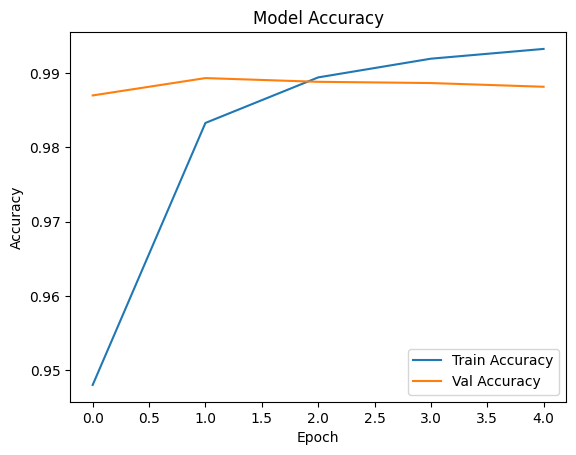

In [73]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


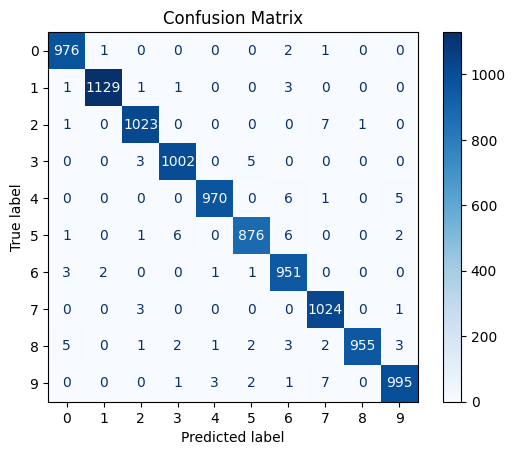

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Predict and Visualize Some Test Digits

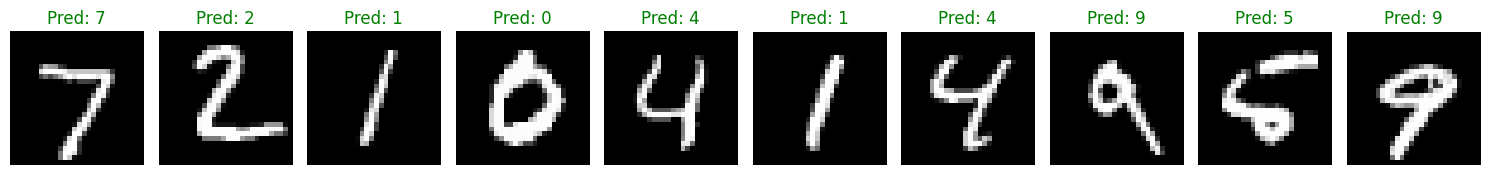

In [75]:
# Visualize predictions on 10 test images
num_images = 10
plt.figure(figsize=(15,4))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}", color='green' if y_pred[i] == y_true[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()

## New Feature: Predict Your Own Handwritten Digit
This allows users to upload their own digit image (e.g., a JPG or PNG) and see what the model predicts.

Saving Number 8 image.png to Number 8 image (2).png

Predicting digit for: Number 8 image (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


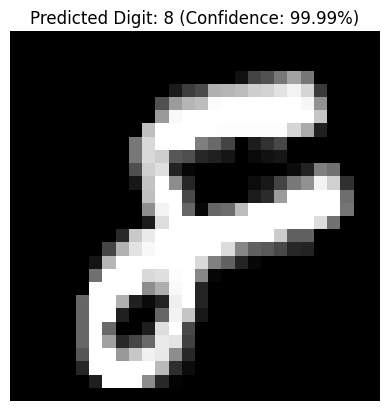

In [79]:
# Extra Feature: Predict Your Own Handwritten Digit

import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Function to preprocess custom image
def preprocess_user_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = 255 - img  # Invert to match MNIST white-on-black format
    img = img / 255.0
    return img.reshape(1, 28, 28, 1)

#  Predict and display result
def predict_digit(image_path):
    img = preprocess_user_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class} (Confidence: {100 * np.max(prediction):.2f}%)")
    plt.axis('off')
    plt.show()

from google.colab import files

#  Step 1: Upload a custom image file
uploaded = files.upload()

#  Step 2: Run prediction on the uploaded file
for fn in uploaded.keys():
    print(f"\nPredicting digit for: {fn}")
    predict_digit(fn)
